# Convolution neural networks


## Prerequisite

The fundamental difference between a densly connected layer and a convolution layer is this:

Dense $\rightarrow$ global patterns.

Convolution $\rightarrow$ local patterns. 

There are 2 properties of CNNs

1. **The patterns they learn are translation invariant:**

    A pattern can be recognized at any place after learning. 

    After learning a certain pattern in a picture, a convnet can recognize this pattern anywhere, which means less training data are required. A densely connected network would have to learn the pattern anew if it appeared at a new location. This makes convnets data efficient when processing images (because the visual world is fundamentally translation invariant): they need fewer training samples to learn representations that have generalization power.
    
    
2. **They can learn spatial hierarchies of patterns:**

    With the number of layer increases, more abstract pattern can be learned.
    
    A first convolution layer will learn small local patterns such as edges, a second convolution layer will learn larger patterns made of the features of the first layers, and so on. This allows convnets to efficiently learn increasingly complex and abstract visual con- cepts (because the visual world is fundamentally spatially hierarchical).

    
These two properties can be shown mathematically.

### Constraining the MLP

To start off, we can consider an MLP with two-dimensional images $\mathbf X$ as inputs and their immediate hidden representations $\mathbf H$ similarly represented as matrices in mathematics and as two-dimensional tensors in code, where both $\mathbf X$ and $\mathbf H$ have the same shape.

We now conceive of not only the inputs but also the hidden representations as possessing spatial structure.

Let 

$[\mathbf X]_{i,j}$ := the pixel at location $(i, j)$ in the input image
    
$[\mathbf H]_{i,j}$ := the pixel at location $(i, j)$ in the hidden representation
    
$[\mathbf U]_{i,j}$ := the biases at location $(i, j)$
    
$[W]_{i,j,k,l}$ := the weight tensors. It is a fourth-order tensor, since the output of input layer and the input of hidden layer has have units $(i, j)$ and $(k, l)$, respectively. If we say $I:=(i, j)$ and $J:=(k, l)$, then $[\mathbf W]_{I,J}$ .
    
Then, we could formally express the fully-connected layer as


$$ [\mathbf H]_{i,j} = [\mathbf U]_{i,j} + \sum_k\sum_l[ W]_{i,j,k,l}[\mathbf X]_{k,l}$$

$$ \quad \quad \quad = [\mathbf U]_{i,j} + \sum_a\sum_b[ V]_{i,j,k,l}[\mathbf X]_{i+a,j+b}$$

where $k=i+a$ and $l=j+b$, and $[V]_{i,j,k,l} = [W]_{i,j,k,l}$. The switch from $W$ to $V$ is entirely cosmetic for now since there is a one-to-one correspondence between coefficients in both fourth-order tensors. In this case, $a$ and $b$ run over both positive and negative offsets.

解释为，对于任何$(i,j)$, $ [\mathbf H]_{i,j} $ 是由$(i,j)$为中心的元素与权重$[V]_{i,j,k,l}$所作的和。



### Translation invariant
Translation invariant implies that a shift in the input $\mathbf X$ should lead to a shift in the hidden representation $\mathbf H$. This is only possible if $V$ and $\mathbf U$ do not depend on $(i,j)$, i.e., we have $[V]_{i,j,a,b}=[\mathbf V]_{a,b}$, and $\mathbf U$ is a constant, say u. As a result, we can simplify the definition for H:

$$ [\mathbf H]_{i,j}=u + \sum_a\sum_b[\mathbf V]_{a,b}[\mathbf X]_{i+a,j+b}$$

Now, imaging that $[\mathbf V]$ is the kernel that need to be learned, then it is independent with $(i,j)$, since for each channel of input namely, a 2-dimensional tensor, a unique kernel is used. This kernel is indenpendent with the position of the 2-dimensional tensor.

As mentioned before, the pattern is local, not global. Hence, we believe that we should not have to look very far away from location $(i, j)$ in order to glean relevant information to assess what is going on at $[H]_{i,j}$. This means that outside some range $|a| > \Delta$ or $|b| > \Delta$, we should set $[\mathbf V]_{a,b} = 0$. Equivalently, we can rewrite $[\mathbf H]i,j$ as

$$ [\mathbf H]_{i,j}=u + \sum_{a=-\Delta}^\Delta \sum_{b=-\Delta}^\Delta [\mathbf V]_{a,b}[\mathbf X]_{i+a,j+b}$$

$[\mathbf V]$即为 kernel, 需要被学习。

In the deep learning research community, V is referred to as a convolution kernel, a filter, or simply the layerʼs weights that are often learnable parameters. When the local region is small, the difference as compared with a fully-connected network can be dramatic. 

While previously, we might have required billions of parameters to represent just a single layer in an image-processing network, we now typically need just a few hundred, without altering the dimensionality of either the inputs or the hidden representations. The price paid for this <u> drastic reduction in parameters</u> is that our features are now translation invariant and that our layer can <u> only incorporate local information</u>, when determining the value of each hidden activation. <u>All learning depends on imposing inductive bias</u>. When that bias agrees with reality, we get sample-efficient models that generalize well to unseen data. But of course, if those biases do not agree with reality, e.g., if images turned out not to be translation invariant, our models might struggle even to fit our training data.

In practice, the kernel is $V$ is size of $3\times3$ or $5\times 5$ 

A very good explanation of CNN, espcially, the kernel, filter, feature maps can be found at 

https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215

### Padding and stride
**Padding**: reduce the impace on boundaries.

**Stride**: reduce the dimensionality. For high-resolution images, too many pixles is unwise

### Pooling layers

Pooling layers, which serve the dual purposes of mitigating the sensitivity of convolutional layers to location and of spatially downsampling representations.
池化层：减弱卷基层对位置的敏感度和对空间降采样表示的敏感度。 降采样是指通过采样来减少图片尺寸。

Pooling operators consist of a fixed-shape window that is slid over all regions in the input according to its stride, computing a single output for each location traversed by the fixed-shape window (sometimes known as the pooling window). It sounds like kernel. However, unlike the cross-correlation computation of the inputs and kernels in the convolutional layer, the pooling layer contains **no parameters**. Thus, in pooling layer, there are no kernels.
 
Pooling operators are deterministic, typically calculating either the maximum or the average value of the elements in the pooling window. These operations are called maximum pooling (max pooling for short) and average pooling, respectively. In both cases, as with the cross-correlation operator, we can think of the pooling window as start- ing from the top left of the input tensor and sliding across the input tensor from left to right and top to bottom. At each location that the pooling window hits, it computes the maximum or average value of the input subtensor in the window, depending on whether max or average pooling is employed. The maximum pooling is shown in figure below.

<div>
<img src="img/Maximum_pooling.png" width="450"/>
</div>
 
**Multi-channel**: when processing multi-channel input data, the pooling layer pools each input channel separately, rather than summing the inputs up over channels as in a convolutional layer. This means that the number of output channels for the pooling layer is the same as the number of input channels.

**padding and stride**: As with convolutional layers, pooling layers can also change the output shape. And as before, we can alter the operation to achieve a desired output shape by padding the input and adjusting the stride. 

We now have all the ingredients required to assemble a fully-functional CNN. Next, We will introduce LeNet, among the first published CNNs to capture wide attention for its performance on computer vision tasks. The model was introduced by (and named for) Yann LeCun, then a researcher at AT&T Bell Labs, for the purpose of recognizing handwritten digits in images 

## LeNet

At a high level, LeNet (LeNet-5) consists of two parts: (i) a convolutional encoder consisting of two convolutional layers; and (ii) a dense block consisting of three fully-connected layers; The architecture is summarized in figure below.

<div>
<img src="img/LeNet.png" width="800"/>
</div>


The basic units in each convolutional block are a convolutional layer, a sigmoid activation function, and a subsequent average pooling operation.

`nn.Conv2D(channels=6, kernel_size=5, padding=2, activation='sigmoid'), nn.AvgPool2D(pool_size=2, strides=2)`

The first convolutional layer has 6 output channels, while the second has 16. Each 2 × 2 pooling operation (stride 2) reduces dimensionality by a factor of 4 via spatial downsampling. The convolutional block emits an output with shape given by (batch size, number of channel, height, width).


In order to pass output from the convolutional block to the dense block, we must flatten each example in the minibatch. In other words, we take this four-dimensional input and transform it into the two-dimensional input expected by fully-connected layers: as a reminder, the two-dimensional representation that we desire has uses the first dimension to index examples in the minibatch and the second to give the flat vector representation of each example. Namely, `(batch size, number of channel, height, width)` $\rightarrow$  `(batch size, number of channels * height * width)`.

LeNetʼs dense block has three fully-connected layers, with 120, 84, and 10 outputs, respectively. Because we are still performing classification, the 10-dimensional output layer corresponds to the number of possible output classes.

In [48]:
from d2l import mxnet as d2l
from mxnet import autograd, gluon, init, np, npx 
from mxnet.gluon import nn

npx.set_np()

npx.cpu(), npx.gpu(), npx.gpu(1)

net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, padding=2, activation='sigmoid'),
        nn.AvgPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=5, activation='sigmoid'), 
        nn.AvgPool2D(pool_size=2, strides=2),
        # `Dense` will transform an input of the shape 
        #    (batch size, number of # channels, height, width) 
        #into an input of the shape 
        #    (batch size, number of channels * height * width) 
        #automatically by default 
        nn.Dense(120, activation='sigmoid'),
        nn.Dense(84, activation='sigmoid'),
        nn.Dense(10))

We took a small liberty with the original model, removing the Gaussian activation in the final layer. Other than that, this network matches the original LeNet-5 architecture.

In [49]:
#Checking the architecture
X = np.random.uniform(size=(1, 1, 28, 28)) 
net.initialize()
for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

conv12 output shape:	 (1, 6, 28, 28)
pool12 output shape:	 (1, 6, 14, 14)
conv13 output shape:	 (1, 16, 10, 10)
pool13 output shape:	 (1, 16, 5, 5)
dense18 output shape:	 (1, 120)
dense19 output shape:	 (1, 84)
dense20 output shape:	 (1, 10)


###  GPU commands
While CNNs have fewer parameters, they can still be more expensive to compute than similarly deep MLPs because each parameter participates in many more multiplications. A GPU is recommended here.

Before training, we need some functions for GPU computing.

We define two convenient functions that allow us to run code even if the requested GPUs do not exist.

In [59]:
def try_gpu(i=0):  #@save
    """Return gpu(i) if exists, otherwise return cpu()."""
    return npx.gpu(i) if npx.num_gpus() >= i + 1 else npx.cpu()

def try_all_gpus():  #@save
    """Return all available GPUs, or [cpu()] if no GPU exists."""
    devices = [npx.gpu(i) for i in range(npx.num_gpus())]
    return devices if devices else [npx.cpu()]

try_gpu(), try_gpu(10), try_all_gpus()

(cpu(0), cpu(0), [cpu(0)])

By default, tensors are created on the CPU. We can query the device where the tensor is located.

In [56]:
x = np.array([1, 2, 3])
print('Number of GPU:', npx.num_gpus())
x.ctx

Number of GPU: 0


cpu(0)

Storage on the GPU

There are several ways to store a tensor on the GPU. For example, we can specify a storage device when creating a tensor. Next, we create the tensor variable $X$ on the first gpu. The tensor created on a GPU only consumes the memory of this GPU. We can use the nvidia-smi command to view GPU memory usage. In general, we need to make sure that we do not create data that exceed the GPU memory limit.

In [60]:
X = np.ones((2, 3), ctx=try_gpu())
X

array([[1., 1., 1.],
       [1., 1., 1.]])

Assuming that you have at least two GPUs, the following code will create a random tensor on the second GPU.

In [61]:
Y = np.random.uniform(size=(2, 3), ctx=try_gpu(1))
Y

array([[0.175846  , 0.17406498, 0.9988499 ],
       [0.24931015, 0.11584287, 0.41044813]])

If we want to add X+Y, where X in the first GPU and Y in the second one. we can transfer X to the second GPU and perform the operation there. Do not simply add X and Y, since this will result in an exception. The runtime engine would not know what to do: it cannot find data on the same device and it fails. Since Y lives on the second GPU, we need to move X there before we can add the two.

In [62]:
Z = X.copyto(try_gpu(1))
print(X)
print(Z)
Y + Z

[[1. 1. 1.]
 [1. 1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]]


array([[1.175846 , 1.174065 , 1.9988499],
       [1.2493101, 1.1158428, 1.4104481]])

Suppose Z already lives on the second GPU. What happens if we still call Z.copyto(gpu(1))? 

It will make a copy and allocate new memory, even though that variable already lives on the desired device.

There are times where, depending on the environment our code is running in, two variables may already live on the same device. So we want to make a copy only if the variables currently live in different devices. In these cases, we can call as_in_ctx. If the variable already live in the specified device then this is a no-op(无效操作). Unless you specifically want to make a copy, as_in_ctx is the method of choice.

In [64]:
Z.as_in_ctx(try_gpu(1)) is Z #The `is` keyword is used to test if two variables refer to the same object.

True

### Training
Then, let start!

In [24]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

For evaluation, we need to make a slight modification to the `evaluate_accuracy` function that we described before. Since the full dataset is in the main memory, we need to copy it to the GPU memory before the model uses GPU to compute with the dataset.

In [31]:
def evaluate_accuracy_gpu(net, data_iter, device=None): #@save
    """Compute the accuracy for a model on a dataset using a GPU."""
    if not device: # Query the first device where the first parameter is on
        device = list(net.collect_params().values())[0].list_ctx()[0] 
    # No. of correct predictions, no. of predictions
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        X, y = X.as_in_ctx(device), y.as_in_ctx(device)
        metric.add(d2l.accuracy(net(X), y), y.size) 
    return metric[0]/metric[1]

In [69]:
def train_ch6(net, train_iter, test_iter, num_epochs, ls, device=d2l.try_gpu()):
    """Train a model with a GPU (defined in Chapter 6)."""
    net.initialize(force_reinit=True, ctx=device, init=init.Xavier())#Xavier initialization
    loss = gluon.loss.SoftmaxCrossEntropyLoss()
    trainer = gluon.Trainer(net.collect_params(),'sgd', {'learning_rate': lr})
    animator = d2l.Animator(xlabel='epoch', xlim=[0, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer = d2l.Timer()
    for epoch in range(num_epochs):
        # Sum of training loss, sum of training accuracy, no. of examples
        metric = d2l.Accumulator(3)
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            # Here is the major difference compared with `d2l.train_epoch_ch3`
            X, y = X.as_in_ctx(device), y.as_in_ctx(device) 
            #If the variable already live in the specified device then this is a no-op. 
            #Unless you specifically want to make a copy, as_in_ctx is the method of choice.
            with autograd.record():
                y_hat = net(X)
                l = loss(y_hat, y) 
            l.backward()
            trainer.step(X.shape[0])
            metric.add(l.sum(), d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_loss = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % 50 == 0:
                animator.add(epoch + i / len(train_iter),
                             (train_loss, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_loss:.3f}, train acc {train_acc:.3f}, '
              f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
              f'on {str(device)}')

loss 0.474, train acc 0.820, test acc 0.815
3460.6 examples/sec on cpu(0)


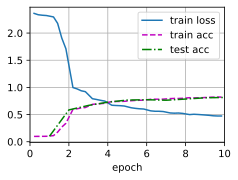

In [70]:
lr, num_epochs = 0.9, 10
train_ch6(net, train_iter, test_iter, num_epochs, lr, device=d2l.try_gpu())

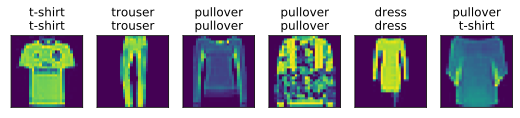

In [71]:
d2l.predict_ch3(net, test_iter)

### Activation functions in a convolution layer

An activation function is the last component of the convolutional layer to increase the non-linearity in the output. Generally, `ReLu` function or `Tanh` function is used as an activation function in a convolution layer. Here is an image of a simple convolution layer, where a $6\times6\times3$ input image is convolved with two kernels of size $4\times4\times3$ to get a convolved feature of size $3\times3\times2$, to which activation function is applied to get the output, which is also referred to as feature map.

<div>
<img src="img/Activation_in_ConLayer.png" width="800"/>
</div>


The figure comes from [source](https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/) 